In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
print(sklearn.__version__)

1.8.0


In [2]:
import os
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [3]:
load_dotenv()

DB_NAME = os.getenv("MYSQL_DATABASE")
DB_USER = os.getenv("MYSQL_USER")
DB_PASSWORD = os.getenv("MYSQL_PASSWORD")
DB_HOST = "127.0.0.1"
DB_PORT = 3306

In [4]:
engine = create_engine(
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

In [7]:
df = pd.read_sql(
    sql="SELECT * FROM coffee_sales",
    con=engine
)

In [13]:
import pandas as pd
from sqlalchemy import create_engine
import time

# 1. CSV faylını oxuyun
csv_file = "/workspaces/Crop-Yield-Prediction/data_preparation/crop_yield_prediction_with_weather.csv"  # Sizin faylın adı
df = pd.read_csv(csv_file)

# 2. MySQL bağlantı məlumatları
MYSQL_DATABASE=MYSQL_DATABASE
MYSQL_USER=MYSQL_USER
MYSQL_PASSWORD=MYSQL_PASSWORD
MYSQL_ROOT_PASSWORD=MYSQL_ROOT_PASSWORD

# Bağlantı engine-i yaradın
engine = create_engine(
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

# 3. Məlumatı bazaya yazın
try:
    print("Məlumatlar bazaya köçürülür...")
    # 'if_exists' parametri: cədvəl varsa neyləsin? (replace/append/fail)
    df.to_sql(name='istifadeciler', con=engine, if_exists='replace', index=False)
    print("Uğurla tamamlandı!")
except Exception as e:
    print(f"Xəta baş verdi: {e}")

NameError: name 'MYSQL_DATABASE' is not defined

In [8]:
# Hər bir sütundakı boş dəyərlərin sayı
print(df.isnull().sum())

order_id    0
product     0
quantity    0
price       0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   order_id  3 non-null      int64  
 1   product   3 non-null      object 
 2   quantity  3 non-null      int64  
 3   price     3 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 228.0+ bytes


In [10]:
df.describe()

,order_id,quantity,price
count,3.0,3.0,3.00
mean,2.0,2.0,4.00
std,1.0,1.0,0.50
min,1.0,1.0,3.50
25%,1.5,1.5,3.75
50%,2.0,2.0,4.00
75%,2.5,2.5,4.25
max,3.0,3.0,4.50


In [12]:
df = df.dropna(subset=[
    'hg/ha_yield',
    'avg_temp',
    'total_precip',
    'average_rain_fall_mm_per_year'
])

KeyError: ['hg/ha_yield', 'avg_temp', 'total_precip', 'average_rain_fall_mm_per_year']

In [13]:
df.isnull().sum()

order_id    0
product     0
quantity    0
price       0
dtype: int64

In [14]:
df['Year'] = df['Year'].astype(int)
df['hg/ha_yield'] = df['hg/ha_yield'].astype(float)
df['avg_temp'] = df['avg_temp'].astype(float)
df['total_precip'] = df['total_precip'].astype(float)
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(float)

KeyError: 'Year'

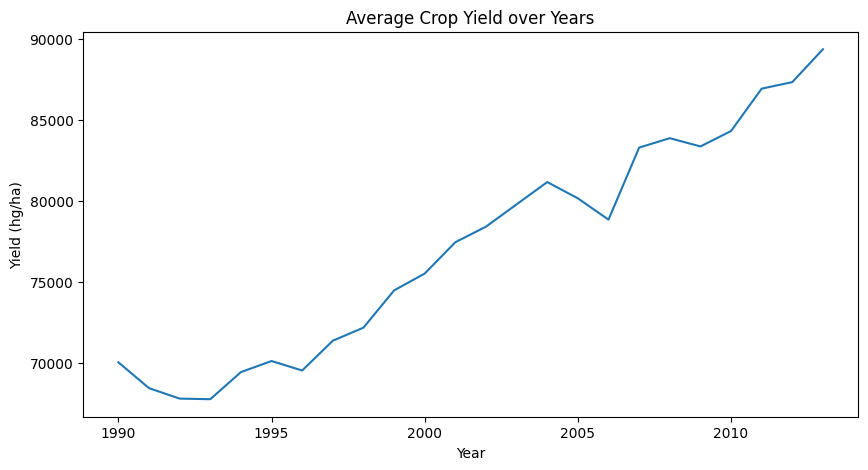

In [ ]:
trend = df.groupby('Year')['hg/ha_yield'].mean()

plt.figure(figsize=(10,5))
plt.plot(trend.index, trend.values)
plt.title('Average Crop Yield over Years')
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.show()

<Axes: title={'center': 'Average Crop Yield over Years'}, xlabel='Year', ylabel='Yield (hg/ha)'>

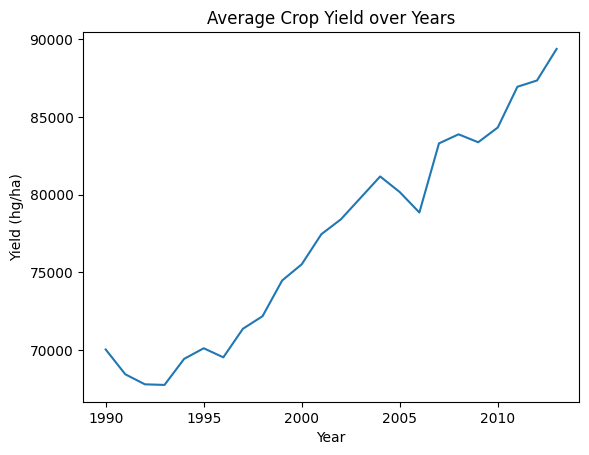

In [ ]:
trend = df.groupby('Year')['hg/ha_yield'].mean()

trend.plot(
    title='Average Crop Yield over Years',
    ylabel='Yield (hg/ha)',
    xlabel='Year'
)


<Axes: title={'center': 'Temperature vs Yield'}, xlabel='avg_temp', ylabel='hg/ha_yield'>

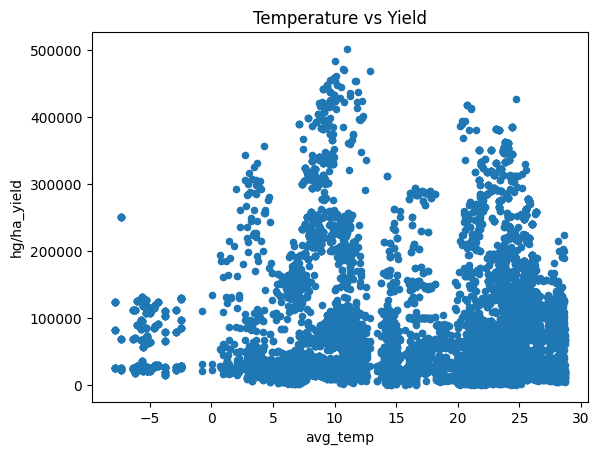

In [ ]:
df.plot.scatter(
    x='avg_temp',
    y='hg/ha_yield',
    title='Temperature vs Yield'
)

In [ ]:
country_yield = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False)

country_yield.head(10)

Area
Belgium    216468.461538
Denmark    214033.020000
Ireland    197913.695652
Bahrain    153237.551724
Germany    143631.344444
Finland    135670.136364
Japan      128851.875776
Jamaica    122347.869565
France     114424.768116
Egypt      114375.304348
Name: hg/ha_yield, dtype: float64

In [ ]:
X = df[
    [
        'avg_temp',
        'total_precip',
        'average_rain_fall_mm_per_year',
        'pesticides_tonnes'
    ]
]

y = df['hg/ha_yield']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 6633611344.990808
R2 Score: 0.036180861787027174


In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients

,Feature,Coefficient
0,avg_temp,-1116.130105
1,total_precip,-4.968332
2,average_rain_fall_mm_per_year,1.495383
3,pesticides_tonnes,0.103311


In [ ]:
annual_avg_temp = df.groupby('Year')['avg_temp'].mean()

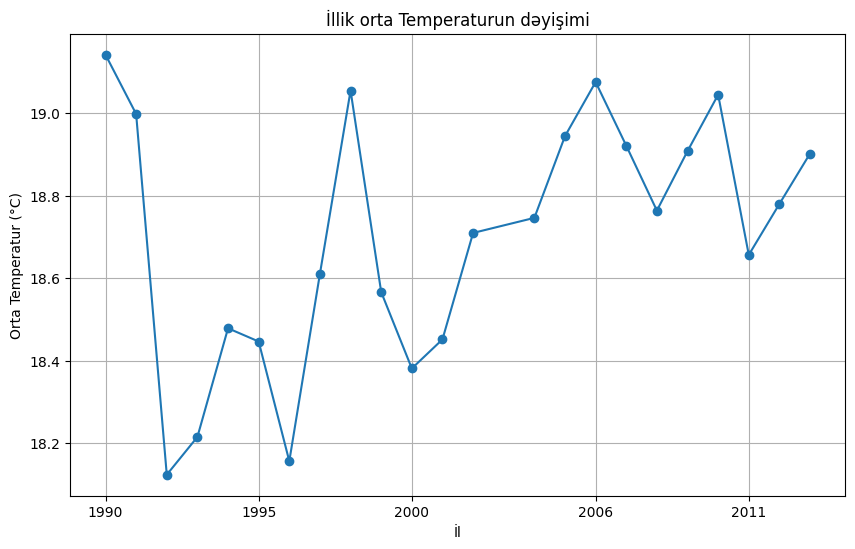

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_temp.index, annual_avg_temp.values, marker='o')
plt.title('İllik orta Temperaturun dəyişimi')
plt.xlabel('İl')
plt.ylabel('Orta Temperatur (°C)')
plt.xticks(annual_avg_temp.index[::5])  # Hər 5 ildən bir etiket
plt.grid(True)
plt.show()

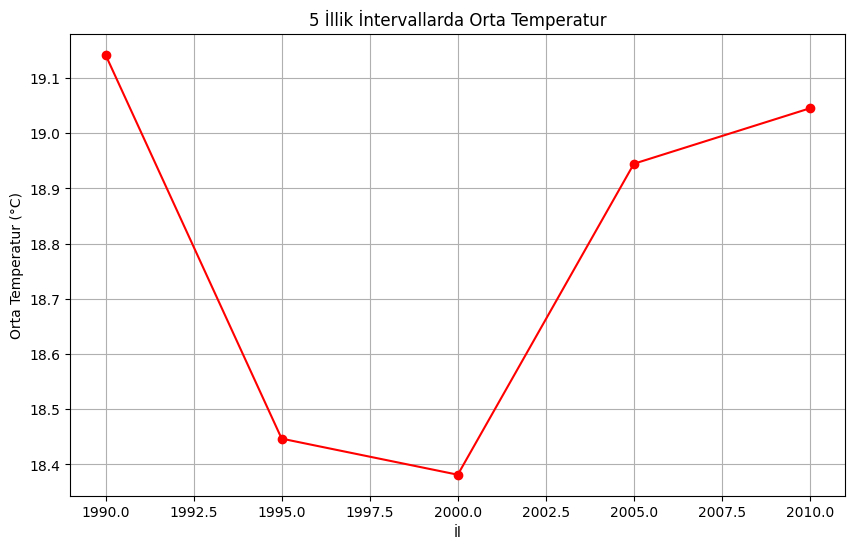

In [ ]:
# 5 illik intervallar
intervals = [1990, 1995, 2000, 2005, 2010, 2015, 2020]

interval_avg_temp = annual_avg_temp[annual_avg_temp.index.isin(intervals)]

plt.figure(figsize=(10, 6))
plt.plot(interval_avg_temp.index, interval_avg_temp.values, marker='o', color='r')
plt.title('5 İllik İntervallarda Orta Temperatur')
plt.xlabel('İl')
plt.ylabel('Orta Temperatur (°C)')
plt.grid(True)
plt.show()

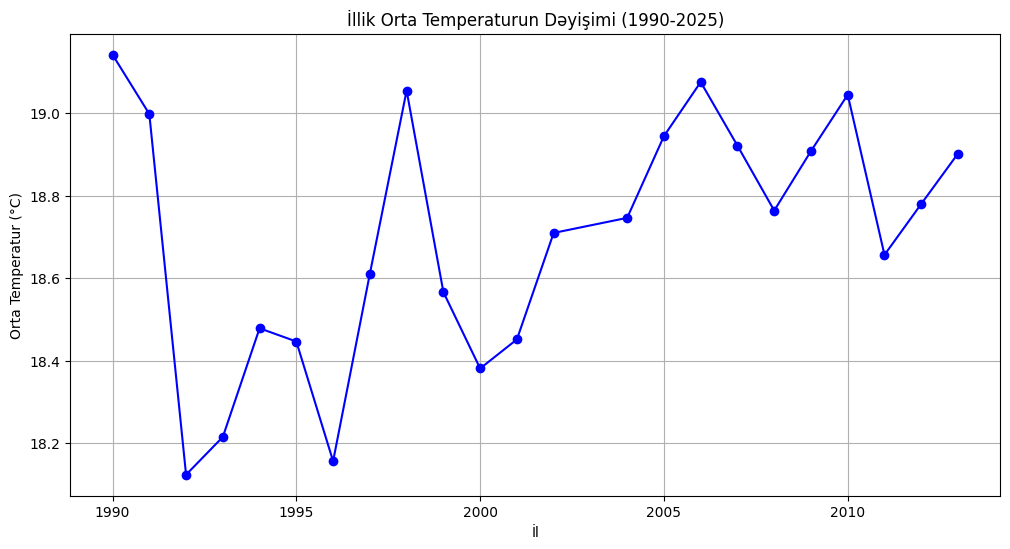

In [ ]:


plt.figure(figsize=(12, 6))
plt.plot(annual_avg_temp.index, annual_avg_temp.values, marker='o', linestyle='-', color='b')
plt.title('İllik Orta Temperaturun Dəyişimi (1990-2025)')
plt.xlabel('İl')
plt.ylabel('Orta Temperatur (°C)')
plt.xticks(range(1990, 2013, 5))  # Hər 5 ildən bir etiket
plt.grid(True)
plt.show()

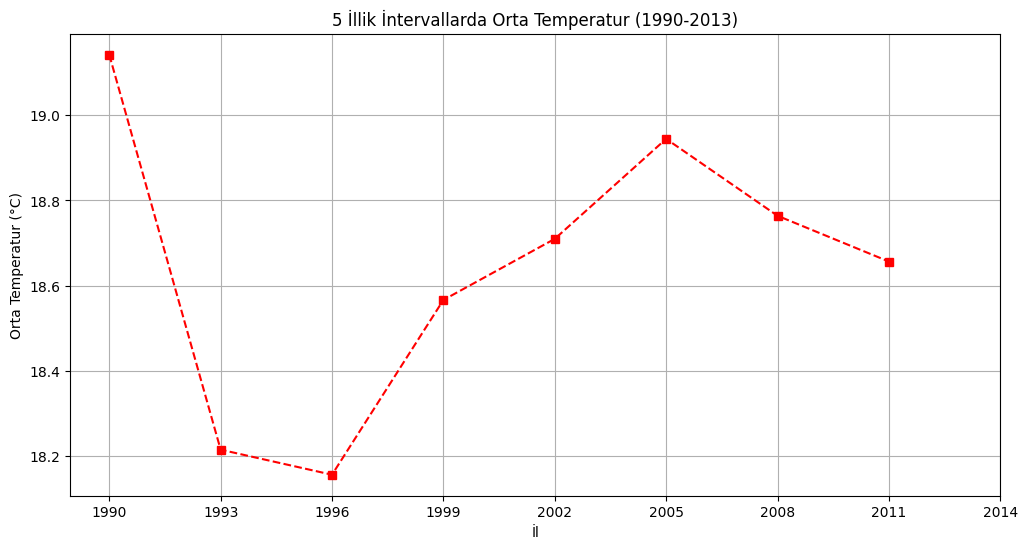

In [ ]:
# 5 illik intervallar üçün dövrləri müəyyən edək
intervals = list(range(1990, 2015, 3))

# Müvafiq intervallarda orta temperaturu seçək
interval_avg_temp = annual_avg_temp[annual_avg_temp.index.isin(intervals)]

plt.figure(figsize=(12, 6))
plt.plot(interval_avg_temp.index, interval_avg_temp.values, marker='s', linestyle='--', color='r')
plt.title('5 İllik İntervallarda Orta Temperatur (1990-2013)')
plt.xlabel('İl')
plt.ylabel('Orta Temperatur (°C)')
plt.xticks(intervals)
plt.grid(True)
plt.show()

Modelin Dəqiqliyi (R2 Score): 0.02
Orta Mütləq Xəta (MAE): 60492.23


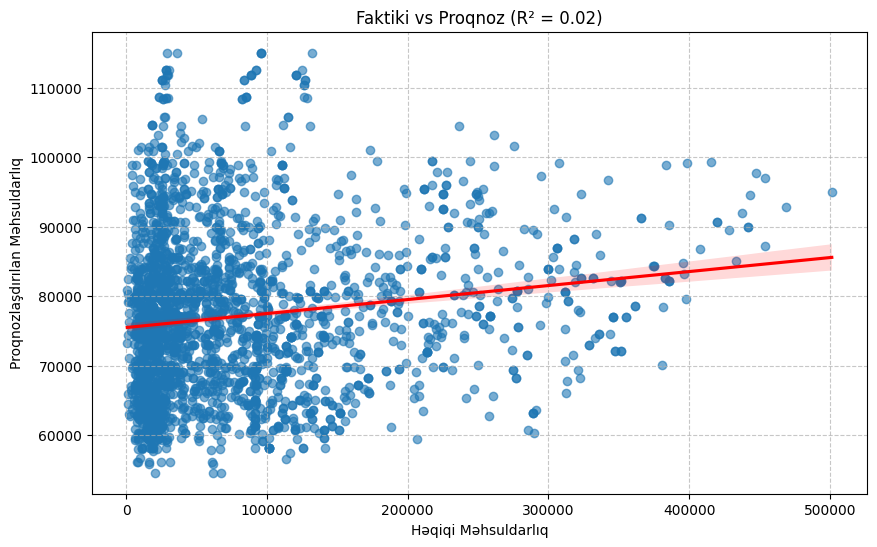

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Faktorların seçilməsi
X = df[['Year', 'total_snow', 'avg_temp']]
y = df['hg/ha_yield']

# 2. Məlumatın bölünməsi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Professional addım: Feature Scaling (Miqyaslama)
# Bu, fərqli diapazonlu rəqəmləri (məs: il 2024, temp 15) eyni səviyyəyə gətirir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Modelin qurulması və öyrədilməsi
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 5. Proqnoz
y_pred = model.predict(X_test_scaled)

# 6. Modelin keyfiyyətinin yoxlanılması (Metrics)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Modelin Dəqiqliyi (R2 Score): {r2:.2f}")
print(f"Orta Mütləq Xəta (MAE): {mae:.2f}")

# 7. Professional Vizualizasiya
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.xlabel('Həqiqi Məhsuldarlıq')
plt.ylabel('Proqnozlaşdırılan məhsuldarlıq')
plt.title(f'Faktiki vs Proqnoz (R² = {r2:.2f})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

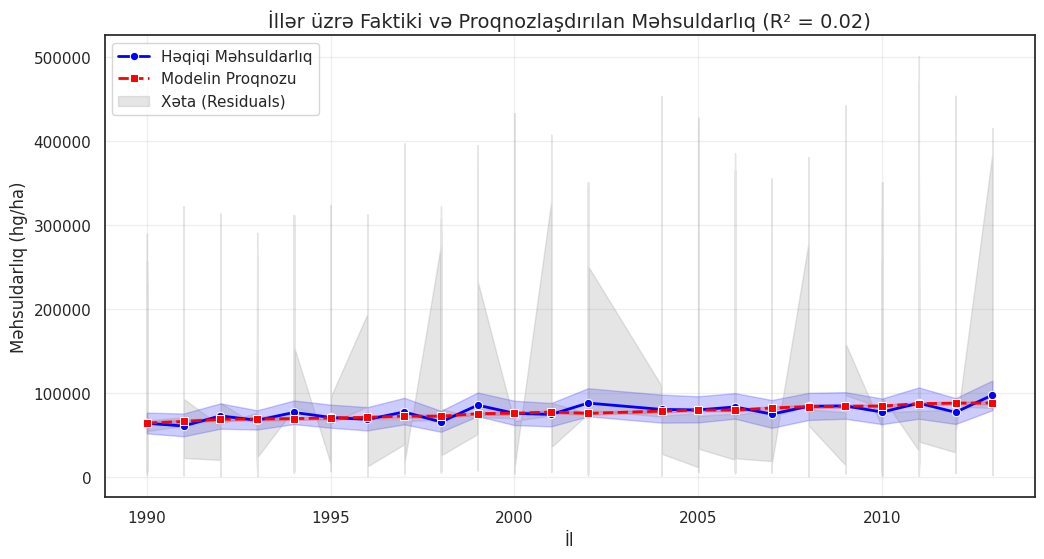

In [ ]:
# 1. Test dəstindəki illəri və həqiqi dəyərləri bir DataFrame-də toplayırıq
results = pd.DataFrame({
    'Year': X_test['Year'],
    'Actual': y_test,
    'Predicted': y_pred
}).sort_values(by='Year') # İlləri ardıcıl düzmək vacibdir

# 2. Vizualizasiya
plt.figure(figsize=(12, 6))

# Həqiqi dəyərlərin xətti
sns.lineplot(data=results, x='Year', y='Actual', label='Həqiqi Məhsuldarlıq', 
             marker='o', color='blue', linewidth=2)

# Proqnoz dəyərlərinin xətti
sns.lineplot(data=results, x='Year', y='Predicted', label='Modelin Proqnozu', 
             marker='s', color='red', linestyle='--', linewidth=2)

# Aradakı fərqi (xətanı) kölgə ilə göstərmək (Professional toxunuş)
plt.fill_between(results['Year'], results['Actual'], results['Predicted'], 
                 color='gray', alpha=0.2, label='Xəta (Residuals)')

# Dizayn tənzimləmələri
plt.title(f'İllər üzrə Faktiki və Proqnozlaşdırılan Məhsuldarlıq (R² = {r2:.2f})', fontsize=14)
plt.xlabel('İl', fontsize=12)
plt.ylabel('Məhsuldarlıq (hg/ha)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

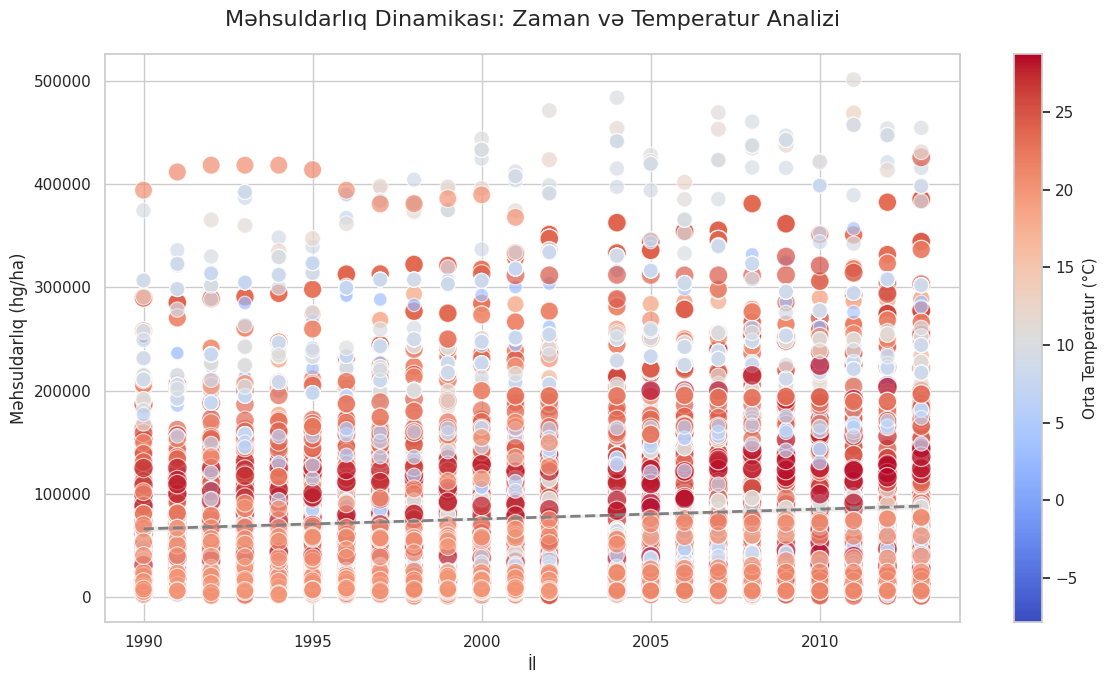

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Professional üslub
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7)) # 'ax' obyektini əvvəlcədən yaradırıq

# Scatter plot
scatter = sns.scatterplot(
    data=df,
    x='Year',
    y='hg/ha_yield',
    hue='avg_temp',
    palette='coolwarm',
    size='avg_temp',
    sizes=(50, 200),
    alpha=0.7,
    ax=ax # Qrafiki bu oxa çəkirik
)

# Trend xətti
sns.regplot(
    data=df, 
    x='Year', 
    y='hg/ha_yield', 
    scatter=False, 
    color='gray', 
    line_kws={"ls": "--", "lw": 2},
    ax=ax
)

# Başlıqlar
ax.set_title('Məhsuldarlıq Dinamikası: Zaman və Temperatur Analizi', fontsize=16, pad=20)
ax.set_xlabel('İl', fontsize=12)
ax.set_ylabel('Məhsuldarlıq (hg/ha)', fontsize=12)

# Legend-i təmizləyib Colorbar əlavə edirik
if ax.get_legend():
    ax.get_legend().remove()

# Colorbar üçün mappable yaradılması
norm = plt.Normalize(df['avg_temp'].min(), df['avg_temp'].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])

# Xətanın həlli: 'ax=ax' parametrini əlavə edirik
cbar = fig.colorbar(sm, ax=ax) 
cbar.set_label('Orta Temperatur (°C)', fontsize=11)

plt.tight_layout()
plt.show()

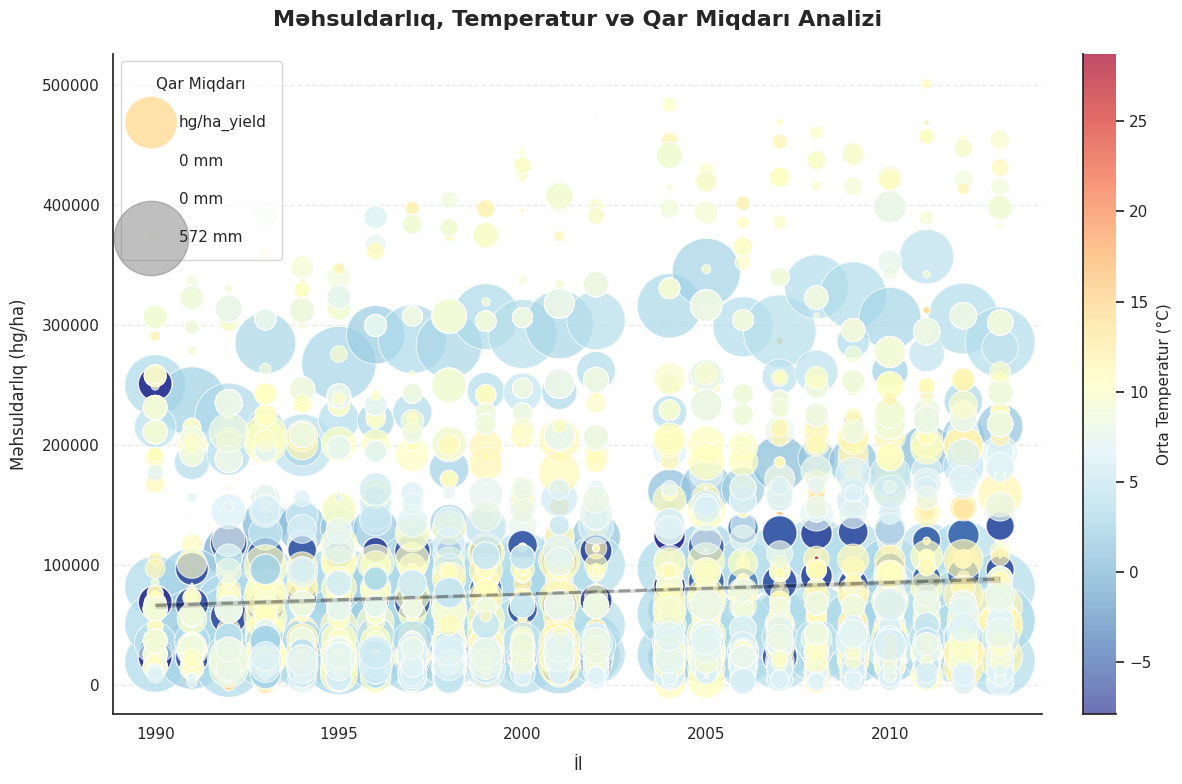

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Stil və Arxa fonun təyin edilməsi
sns.set_theme(style="white", palette="muted")
plt.figure(figsize=(12, 8))

# 2. Qar miqdarını daha yaxşı vizuallaşdırmaq üçün ölçü faktorunu tənzimləyirik
# s=df['total_snow'] bəzən çox kiçik və ya çox böyük ola bilər, ona görə kvadratik scale daha yaxşıdır
sizes = df['total_snow'] * 5 

# 3. Əsas Scatter Plot
scatter = plt.scatter(
    data=df,
    x='Year',
    y='hg/ha_yield',
    c='avg_temp',
    s=sizes,
    cmap='RdYlBu_r', # Qırmızıdan Maviyə daha professional keçid (Soyuq-İsti üçün)
    alpha=0.7,
    edgecolors='white', # Qara kənar (k) yerinə ağ daha təmiz görünür
    linewidth=0.8
)

# 4. Trend Xəttinin əlavə edilməsi (Məhsuldarlıq istiqamətini görmək üçün)
sns.regplot(data=df, x='Year', y='hg/ha_yield', scatter=False, color='black', 
            line_kws={"ls": "--", "alpha": 0.3})

# 5. Oxların və Başlığın tərtibatı
plt.title('Məhsuldarlıq, Temperatur və Qar Miqdarı Analizi', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('İl', fontsize=12, labelpad=10)
plt.ylabel('Məhsuldarlıq (hg/ha)', fontsize=12, labelpad=10)

# 6. Colorbar (Temperatur üçün)
cbar = plt.colorbar(scatter, fraction=0.046, pad=0.04)
cbar.set_label('Orta Temperatur (°C)', fontsize=11)
cbar.outline.set_visible(False) # Colorbar kənarını silmək daha müasir görünür

# 7. Ölçü Legend-i (Qar miqdarı üçün professional yanaşma)
# Boş scatterlər ilə ölçü fərqlərini izah edirik
for size in [df['total_snow'].min(), df['total_snow'].median(), df['total_snow'].max()]:
    plt.scatter([], [], c='gray', alpha=0.5, s=size*5, label=f'{int(size)} mm')

plt.legend(title='Qar Miqdarı', labelspacing=1.5, title_fontsize='11', 
           loc='upper left', frameon=True, borderpad=1)

# 8. Qrafiki təmizləmək
sns.despine() # Üst və sağ çərçivələri silir
plt.grid(axis='y', linestyle='--', alpha=0.4) # Sırf yatay xətlər oxunaqlığı artırır
plt.tight_layout()
plt.show()